install.packages("dplyr")

In [3]:
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
install.packages("usmap")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
install.packages("scales")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
library(usmap)

In [7]:
library(ggplot2)

In [8]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [9]:
#Extracted HCPCS code from Physician and Other Supplier Data CY 2017 base of LIST OF MEDICARE TELEHEALTH SERVICES in CY 2017, saved as MedicareAllTelehealth2017.csv
setwd ("/Users/ruyazhang/downloads")

In [10]:
dat1 <- read.csv("MedicareAllTelehealth2017.csv")

In [11]:
#medicare1 <- dat1[,c("State", "Gender", "Credentials", "City", "ProviderType")]
#summary(medicare1, maxsum = 100)

In [12]:
#aggregate the total NumberServices in 59 states
aggNumServices <- aggregate(NumberServices ~ State, dat1, sum)

In [13]:
aggNumServices[order(aggNumServices$NumberServices),]

,State,NumberServices
4,AP,589.0
1,AE,4460.0
58,XX,4492.0
29,MP,4804.0
59,ZZ,5811.0
14,GU,19324.0
52,VI,25649.0
2,AK,194642.0
57,WY,216437.5
44,PR,223525.0


In [14]:
#Summary statistic (mean, standard deviation, median, Interquartile Range(25th and 75th percentile), min,max)
#summary(aggNumServices)

In [15]:
#read dataset from CMS for medicare benificiaries(FFS) CY 2017
setwd ("/Users/ruyazhang/downloads")

In [16]:
dat2 <- read.csv("StateCountyFFS2017.csv")

In [17]:
# The data contains county level, extrated State Total FFS population, 53 states
stateBeneficiaries <- select(filter(dat2, County == "STATE TOTAL"), c(State, Beneficiaries) )

In [57]:
#print(stateBeneficiaries)

In [58]:
#df <- merge(x=stateBeneficiaries, y=aggNumServices, by = "State", all=TRUE, sort=TRUE)

In [18]:
#merge is a function in dplyr package, this merge reduced from 55 states in telehealth data to 53 states from FFS
df <- merge(x=stateBeneficiaries, y=aggNumServices, by = "State")

In [19]:
#Culculation NumberServices/Beneficiaries(FFS) and converted number to  numeric
df$ServicePerFFS <- df[,3]/as.numeric(as.character(df[,2]))

In [23]:
#print(df)

In [73]:
#write.csv(df, "stateAll.csv")

In [74]:
#setwd("/Users/ruyazhang/downloads")

In [75]:
#df <- read.csv("stateAll.csv")

In [76]:
#df <- df[,-1]

In [20]:
#rename the 4 columns in below format, in order to merge to Usmap dataset
names(df) <- c("abbr","FFSpop","Service","ServicePerFFS")

In [21]:
#merge to Usmap dataset by "abbr"
df <- merge(statepop, df, by="abbr")

In [79]:
#df$ServicePerFFS <- df$ServicePerFFS *100

In [95]:
#print(df)

In [26]:
#plot_usmap(data = df, values = "ServicePerFFS", color = "red") + 
#  scale_fill_continuous(name = "ServicePerFFS1k (2017)", 
#                        type = "viridis", 
#                        labels = paste(round(quantile(df$ServicePerFFS),2),
#                                       names(quantile(df$ServicePerFFS)), "")) + 
#  theme(legend.position = "right") 

In [82]:
#setwd ("/Users/ruyazhang/downloads")

In [83]:
#dat1 <- read.csv("MedicareAllTelehealth2017.csv")

In [22]:
#aggregate unique NPI from MedicareAllTelehealth2017.csv dataset for total MD in 55 states
UniqueNPI <- summarize(group_by(dat1, State), unique_NPI = n_distinct(NPI))

`summarise()` ungrouping output (override with `.groups` argument)


In [23]:
#Rename to below
names(UniqueNPI) <- c("abbr","NumberOfProvider")

In [24]:
#merge total MD(providers) to df
df <- merge(df, UniqueNPI, by="abbr")

In [30]:
#plot_usmap(data = df, values = "NumberOfProvider", color = "red") + 
#  scale_fill_continuous(name = "NumberOfProvider(2017)", type = "viridis", label = scales::comma) + 
#  theme(legend.position = "right")

In [25]:
#Culculation Provider/Beneficiaries(FFS) and converted number to numeric
df$ProviderPerFFS <- df[,8]/as.numeric(as.character(df[,5]))
#df$ProviderPerFFS <- df$ProviderPerFFS *10000

In [33]:
#plot_usmap(data = df, values = "ProvidersPerFFS", color = "red") + 
#  scale_fill_continuous(name = "ProvidersPerFFS10k(2017)", type = "viridis", label = scales::comma) + 
#  theme(legend.position = "right")

In [26]:
#Added new column for the year of the datasets
df$Year <- 2017

In [27]:
#Extracted HCPCS code from Physician and Other Supplier Data CY 2016 base of LIST OF MEDICARE TELEHEALTH SERVICES in CY 2016, saved as MedicareAllTelehealth2016.csv
setwd ("/Users/ruyazhang/downloads")
dat3 <- read.csv("MedicareAllTelehealth2016.csv")

In [28]:
#aggregate the total NumberServices in 60 states
aggNumServices <- aggregate(NumberServices ~ State, dat3, sum)
aggNumServices[order(aggNumServices$NumberServices),]

,State,NumberServices
1,AA,156.0
5,AP,1204.0
59,XX,2119.0
2,AE,2514.0
30,MP,3134.0
60,ZZ,6363.0
53,VI,22931.0
15,GU,24441.0
3,AK,192151.0
58,WY,223518.0


In [29]:
#read dataset from CMS for medicare benificiaries(FFS) CY 2016
setwd ("/Users/ruyazhang/downloads")
dat4 <- read.csv("StateCountyFFS2016.csv")

In [30]:
# The data contains county level, extrated State Total FFS population, 53 states
stateBeneficiaries <- select(filter(dat4, County == "STATE TOTAL"), c(State, Beneficiaries) )

In [31]:
#merge is a function in dplyr package, this merge reduced from 60 states in telehealth data to 53 states from FFS
df2 <- merge(x=stateBeneficiaries, y=aggNumServices, by = "State")

In [32]:
#Culculation NumberServices/Beneficiaries(FFS) and converted number to numeric
df2$ServicePerFFS <- df2[,3]/as.numeric(as.character(df2[,2]))

In [33]:
#rename the 4 columns in below format, in order to merge to Usmap dataset, and merge to Usmap dataset by "abbr"
names(df2) <- c("abbr","FFSpop","Service","ServicePerFFS")
df2 <- merge(statepop, df2, by="abbr")

In [34]:
#aggregate unique NPI from MedicareAllTelehealth2017.csv dataset for total MD in 55 states
UniqueNPI <- summarize(group_by(dat3, State), unique_NPI = n_distinct(NPI))
#Rename to below
names(UniqueNPI) <- c("abbr","NumberOfProvider")
#merge total MD(providers) to df2
df2 <- merge(df2, UniqueNPI, by="abbr")

`summarise()` ungrouping output (override with `.groups` argument)


In [35]:
#Culculation Providers/Beneficiaries(FFS) and converted number to numeric
df2$ProviderPerFFS <- df2[,8]/as.numeric(as.character(df2[,5]))

In [36]:
#Added new column for the year of the datasets
df2$Year <- 2016

In [37]:
#Stack two dataframe df and df2
dfAll <- rbind(df, df2)

Warning message:
“Use of `map_df$x` is discouraged. Use `x` instead.”Warning message:
“Use of `map_df$y` is discouraged. Use `y` instead.”Warning message:
“Use of `map_df$group` is discouraged. Use `group` instead.”

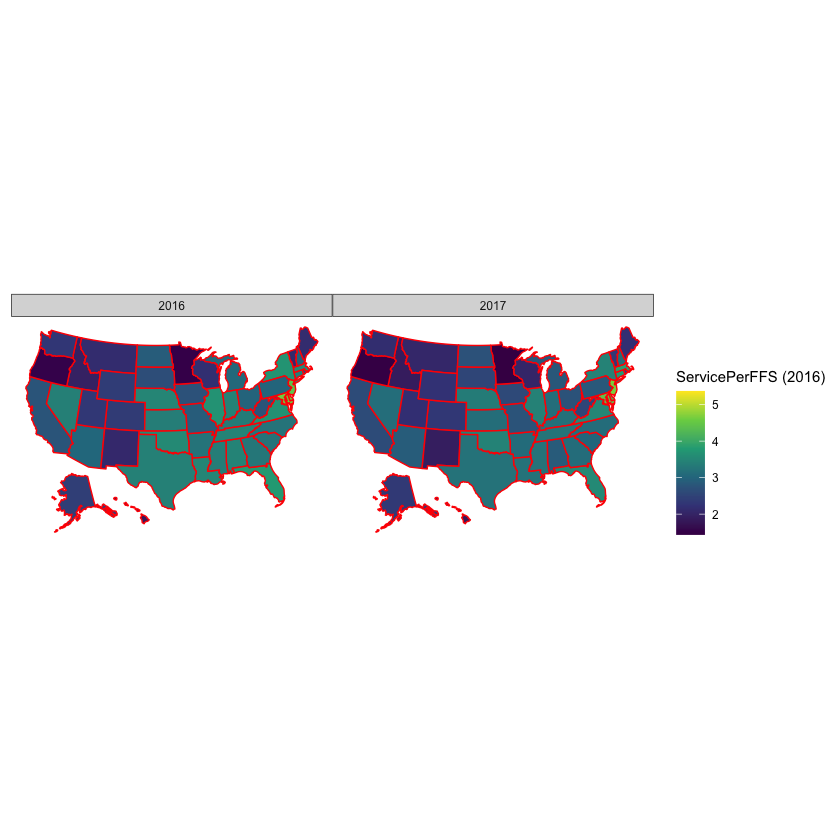

In [42]:
#Plotting for ServicePerFFS
plot_usmap(data = dfAll, values = "ServicePerFFS", color = "red") + 
  scale_fill_continuous(name = "ServicePerFFS", 
                        type = "viridis") + 
  theme(legend.position = "right") +
  facet_wrap(~Year)

Warning message:
“Use of `map_df$x` is discouraged. Use `x` instead.”Warning message:
“Use of `map_df$y` is discouraged. Use `y` instead.”Warning message:
“Use of `map_df$group` is discouraged. Use `group` instead.”

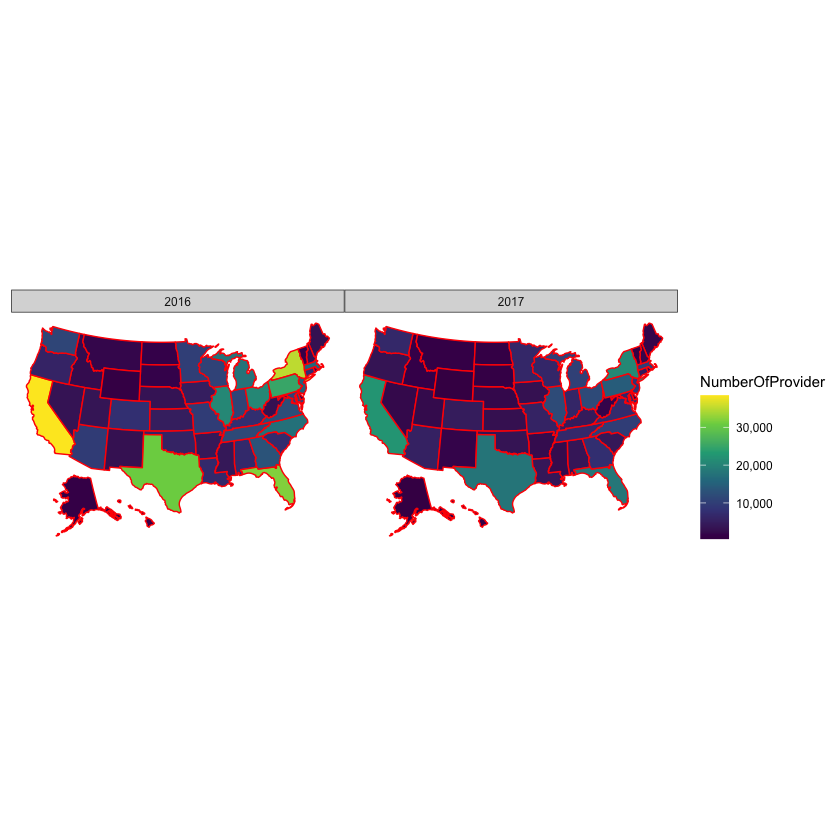

In [44]:
#Plotting for NumberOfProvider
plot_usmap(data = dfAll, values = "NumberOfProvider", color = "red") + 
  scale_fill_continuous(name = "NumberOfProvider", type = "viridis", label = scales::comma) + 
  theme(legend.position = "right") +
  facet_wrap(~Year)

In [ ]:
#Plotting for ProviderPerFFS
plot_usmap(data = dfAll, values = "ProviderPerFFS", color = "red") +   
  labs(title = "US Counties", subtitle = "Number Of Provider/FFS") +
  scale_fill_continuous(name = "", type = "viridis", label = scales::comma) + 
  theme(legend.position = "right") +
  facet_wrap(~Year)

The primary outcomes of interests were Medicare telehealth services density and providers’ density, defined as the number of services and providers Medicare FFS beneficiaries aggregated at the state level. Two datasets were used: the Medicare Provider Utilization and Payment Data: Physician and Other Supplier public use file (PUF) and the Medicare FFS enrollment PUF data for the calendar year 2016 and 2017. The provider PUF includes summaries of service and procedures provided by physicians and other health-care professionals to the Medicare FFS beneficiaries, who are not enrolled in Medicare Advantage plans, with specific information on the following: (1) provider, such as their unique national provider identifier(NPI), address, and specialty type; (2) utilization, such as the Health Care Common Procedure Coding System codes and total provider services; and (3) payment, such as the Medicare-allowed amount for the specific service and procedure. The enrollment PUF provides data on Medicare enrollment, such as the counts of Medicare FFS beneficiaries aggregated at varied geographic scales.

Medicare covered telehealth services were identified by the list of Medicare telehealth services corresponding HCPCS code:
LIST OF MEDICARE TELEHEALTH SERVICES 
CY 2016
LIST OF MEDICARE TELEHEALTH SERVICES 
CY 2017

and summarized the total number of Medicare telehealth utilizations. We aggregated the total utilization numbers of services and provides at the state level, which were subsequently divided by the total number of Medicare FFS beneficiaries at the state level.


Descriptive statistics of Medicare telehealth utilization were mapped by number of services/FFS and provider/FFS in year of 2016 and 2017.